In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

OPENING THE DATASET AND DESCRIBING ITS FEATURES:

In [8]:
df=pd.read_csv(r"C:\Users\User\Desktop\ML_Dataset_CO2Emission.csv - ML_Dataset_CO2Emission.csv.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine_Size       1067 non-null   float64
 1   Cylinders         1067 non-null   int64  
 2   Fuel_Consumption  1067 non-null   float64
 3   CO2_Emissions     1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


VISUAL REPRESENTATION OF THE DATASET USING A SCATTER PLOT

To check if a linear relationship exists between the dependant and independent variables

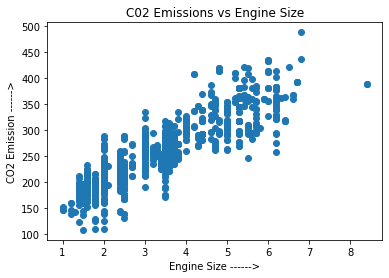

In [12]:
plt.scatter(df["Engine_Size"],df["CO2_Emissions"])
plt.title("C02 Emissions vs Engine Size")
plt.xlabel("Engine Size ------>")
plt.ylabel("CO2 Emission ------>")
plt.show()

SPLITTING THE DATASET INTO TRAINING AND TEST DATASETS

In [17]:
from sklearn.model_selection import train_test_split as tts
training_data, test_data = tts(df, test_size = 0.2, random_state = 0)
print("Training Data:\n",training_data.head)
print("\nTest Data\n",test_data.head)

Training Data:
 <bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
270           3.6          6              14.6            290
1006          4.6          8              16.9            347
728           3.5          6              12.1            244
992           2.5          4              10.6            218
702           1.5          4               8.0            170
...           ...        ...               ...            ...
1033          2.0          4               7.9            186
763           3.5          6              17.8            256
835           3.7          6              13.5            269
559           5.0          8              15.8            306
684           3.7          6              13.1            262

[853 rows x 4 columns]>

Test Data
 <bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
766           5.5          8              17.2            356
204           2.4  

CREATING THE MODEL

In [18]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
train_x = np.asanyarray(training_data[['Engine_Size']])
train_y = np.asanyarray(training_data[['CO2_Emissions']])
lin_reg.fit(train_x, train_y)

#Coefficients
print("X Coefficient: ", lin_reg.coef_)
print("Y Intercept: ", lin_reg.intercept_)

X Coefficient:  [[39.24838431]]
Y Intercept:  [126.18920155]


PLOTTING THE REGRESSION LINE

Text(0, 0.5, 'CO2 Emission')

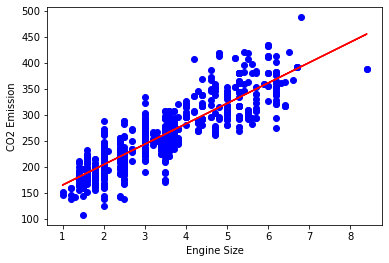

In [19]:
plt.scatter(training_data.Engine_Size, training_data.CO2_Emissions, color = 'blue')
plt.plot(train_x, lin_reg.coef_[0][0]*train_x + lin_reg.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')

EVALUATING THE MODEL USING R2-SCORE


In [20]:

from sklearn.metrics import r2_score
test_x = np.asanyarray(test_data[['Engine_Size']])
test_y = np.asanyarray(test_data[['CO2_Emissions']])
test_y1 = lin_reg.predict(test_x)
print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y1 - test_y)))
print('Residual Sum of Squares: %.2f' % np.mean(np.absolute(test_y1 - test_y)**2))
print('R2-Score: %.2f' % r2_score(test_y, test_y1))

Mean Absolute Error: 25.57
Residual Sum of Squares: 1181.53
R2-Score: 0.72
